<center><img src="car.jpg" width=500></center>


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`) 

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [1]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Start coding!

In [2]:
car_insurance = pd.read_csv('car_insurance.csv')
car_insurance

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,1,0,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,1,0,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,1,1,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,1,0,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [3]:
car_insurance = car_insurance.astype({
    'age': 'category',
    'gender': 'category',
    'education': 'category',
    'income': 'category',
    'credit_score': 'float64',
    'vehicle_ownership': 'bool',
    'vehicle_year': 'category',
    'driving_experience': 'category',
    'married': 'bool',
    'children': 'int32',
    'postal_code': 'category',
    'annual_mileage': 'float64',
    'vehicle_type': 'category',
    'speeding_violations': 'int32',
    'duis': 'int32',
    'past_accidents': 'int32',
    'outcome': 'bool'
})
car_insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,True,after 2015,False,1,10238,12000.0,sedan,0,0,0,False
1,750365,0,1,0-9y,none,poverty,0.357757,False,before 2015,False,0,10238,16000.0,sedan,0,0,0,True
2,199901,0,0,0-9y,high school,working class,0.493146,True,before 2015,False,0,10238,11000.0,sedan,0,0,0,False
3,478866,0,1,0-9y,university,working class,0.206013,True,before 2015,False,1,32765,11000.0,sedan,0,0,0,False
4,731664,1,1,10-19y,none,working class,0.388366,True,before 2015,False,0,32765,12000.0,sedan,2,0,1,True


In [4]:
car_insurance.isna().sum()

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

In [5]:
X = car_insurance.drop(columns=['id', 'outcome'])
y = car_insurance['outcome'].astype(int)

In [6]:
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['age', 'gender', 'education', 'income', 'vehicle_year', 'driving_experience', 'postal_code', 'vehicle_type']),
        ('num', StandardScaler(), ['credit_score', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents'])
    ]
)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
logreg = make_pipeline(transformer, SimpleImputer(), LogisticRegression(penalty='l2', C=1, solver='liblinear'))
dtc = make_pipeline(transformer, SimpleImputer(), DecisionTreeClassifier(max_depth=7, min_samples_leaf=.01, min_samples_split=.05))

In [9]:
logreg.fit(X_train, y_train)
dtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['age', 'gender', 'education',
                                                   'income', 'vehicle_year',
                                                   'driving_experience',
                                                   'postal_code',
                                                   'vehicle_type']),
                                                 ('num', StandardScaler(),
                                                  ['credit_score',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis',
                                                   'past_accidents'])])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=7, min_samples_leaf=0.01,
                                        min_samples_split=0.05))])

In [10]:
logreg_pred = logreg.predict(X_test)
dtc_pred = dtc.predict(X_test)

In [11]:
logreg_acc = accuracy_score(y_test, logreg_pred)
dtc_acc = accuracy_score(y_test, dtc_pred)
print(f'Logistic Regression Accuracy: {logreg_acc}, Decision Tree Accuracy: {dtc_acc}')

Logistic Regression Accuracy: 0.8325, Decision Tree Accuracy: 0.817


In [12]:
X_test.shape

(2000, 16)

In [13]:
logreg.steps[2][1].coef_

array([[-0.01878211, -0.11374905, -0.14026497,  0.95739002,  0.01897755,
        -0.04540747,  0.69325753, -0.27151656,  0.34442648,  1.66290409,
        -1.70102406, -3.32399228, -3.84434907,  6.09790722,  1.05279936,
         1.2793578 , -0.17086722, -0.01016393,  0.37839248,  0.0221229 ,
         0.02028861, -0.17397553]])

In [14]:
output = pd.DataFrame(logreg.steps[2][1].coef_.flatten(), index=logreg.steps[0][1].get_feature_names_out(), columns=['coef']).sort_values(by='coef', ascending=False)
output['coef'] = (output['coef'] - output['coef'].min()) / (output['coef'].max() - output['coef'].min())
output

,coef
cat__postal_code_21217,1.000000
cat__vehicle_year_before 2015,0.553924
cat__postal_code_92101,0.515346
cat__postal_code_32765,0.492559
cat__gender_1,0.482963
cat__income_poverty,0.456396
num__annual_mileage,0.424727
cat__income_working class,0.421310
num__speeding_violations,0.388893
num__duis,0.388708


In [15]:
best_feature_df = output[output['coef'] == output['coef'].max()].reset_index().rename(columns={'index': 'best_feature', 'coef': 'best_feature'})
best_feature_df

,best_feature,best_feature
0,cat__postal_code_21217,1.0


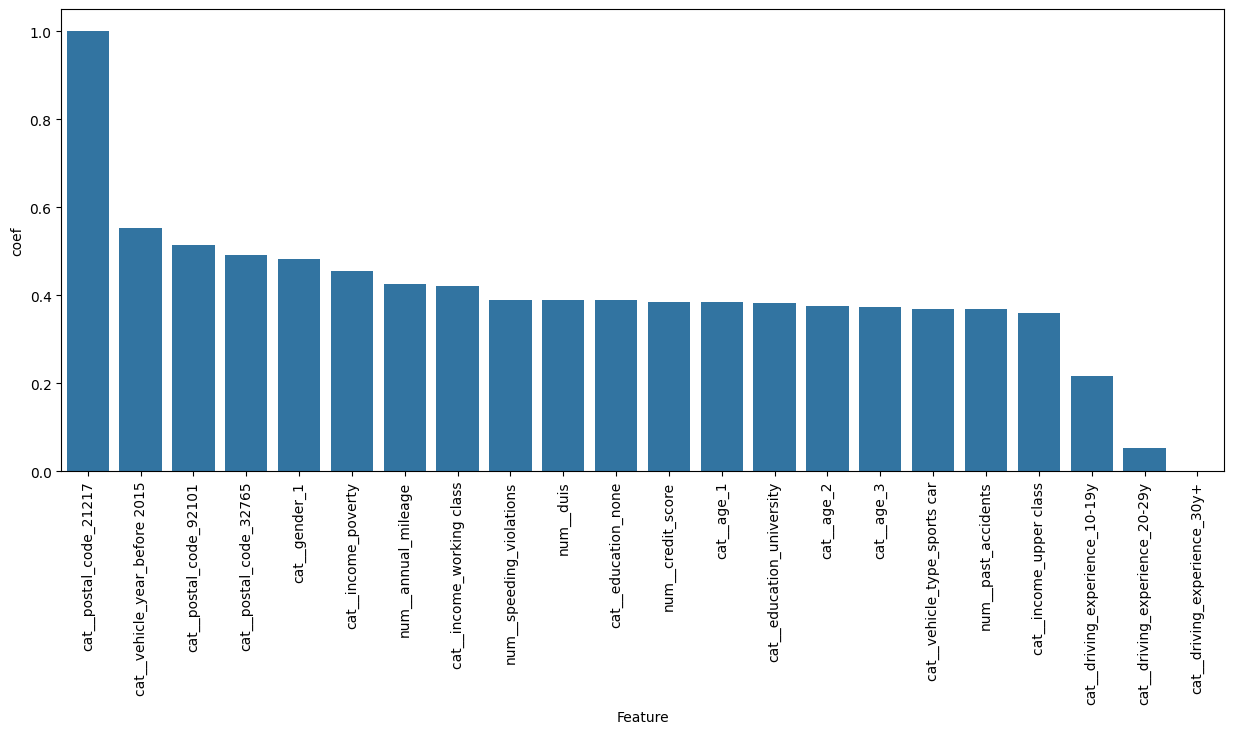

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6))
sns.barplot(x='index', y='coef', data=output.reset_index())
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.show()